## SCRAPING SITO DEL CENTRO RICERCA IIT.cnr

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://www.iit.cnr.it/en"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
IIT - CNR - Istituto di Informatica e Telematica


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['/en/services',
 '/en/institute/mission',
 '/en/scientific_results/publications',
 '/en/education_job/courses_school',
 '/en/node/1695',
 '/en/taxonomy/term/424',
 '/en/scientific_results/presentations_demos',
 '/en/sitemap',
 '/en/taxonomy/term/179',
 '/en/press_communication/web_press_clippings',
 '/en/taxonomy/term/129',
 'http://www.cnr.it',
 '/en/education_job/alternation-school-work',
 '/en/taxonomy/term/132',
 '/pec',
 '/en/events',
 '/en/node/59599',
 '/en/taxonomy/term/143',
 '/en/services/it_domain_registration',
 '/node/58703',
 '/node/57480',
 '/en/services/services_technological_development',
 '/en/education_job/degree_prize_denoth%22',
 '/en/events/seminars',
 '/en/node/1696',
 '/en/education_job/phd',
 '/node/57839',
 '/en/research_fields/internet_governance',
 '/en/jobs',
 '/en/press_communication/radio_tv_interviews',
 '/en/institute/people',
 '/en/personal-data-use',
 'http://www.iit.cnr.it',
 '/en/institute/projects',
 '/en/taxonomy/term/152',
 'http://www.labdoc.it

In [5]:
lista_url2=[x for x in lista_url if '/en/research_fields/' in x]
lista_url2=list(set(lista_url2))
lista_url2

['/en/research_fields/ubiquitous_internet',
 '/en/research_fields/internet_governance',
 '/en/research_fields/trustworthy_future_internet',
 '/en/research_fields/algorithms_computational_mathematics',
 '/en/research_fields/web_applications_future_internet']

In [6]:
string = 'https://www.iit.cnr.it'
lista_url2 = [string+x for x in lista_url2]
lista_url2

['https://www.iit.cnr.it/en/research_fields/ubiquitous_internet',
 'https://www.iit.cnr.it/en/research_fields/internet_governance',
 'https://www.iit.cnr.it/en/research_fields/trustworthy_future_internet',
 'https://www.iit.cnr.it/en/research_fields/algorithms_computational_mathematics',
 'https://www.iit.cnr.it/en/research_fields/web_applications_future_internet']

In [8]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"article"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Ubiquitous Internet | IIT - CNR - Istituto di Informatica e Telematica',
 'The Future of Global Internet governance | IIT - CNR - Istituto di Informatica e Telematica',
 'Trustworthy and Secure Future Internet | IIT - CNR - Istituto di Informatica e Telematica',
 'Algorithms and Computational Mathematics | IIT - CNR - Istituto di Informatica e Telematica',
 'Web Applications for the Future Internet | IIT - CNR - Istituto di Informatica e Telematica']

In [9]:
print(texts[1])

Access Best practices Critical Internet resources Development Freedoms Future Internet IGF Innovation Inter-governmental organization Internet Internet Governance IPv6 ISOC Public policy Robustness Security Stability Sustainability 
CNR was involved in the Global Internet governance matters at international level since the ARPAnet times. Now, the IIT institute is the promoter, within CNR, of a new multi-disciplinary research project on Internet governance to study questions that are coming from the evolving needs of the global Internet and are connected to technical standardization, to resource allocation and assignment, to legal and regulatory matters, to public policy and societal issues, to technologies, practices and to the evolving needs of the global Internet. While we are coming from a technological background, we recognize that it is important to work with all stakeholders from all sectors to achieve the fullest benefits of the Internet for all participants in the global networ

### TEXT CLEANING

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

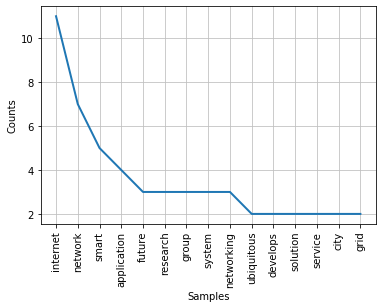

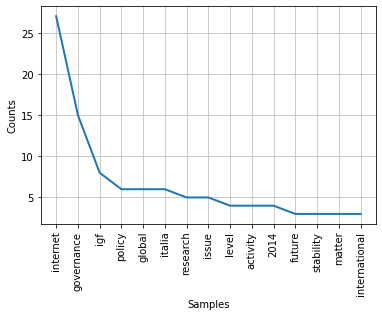

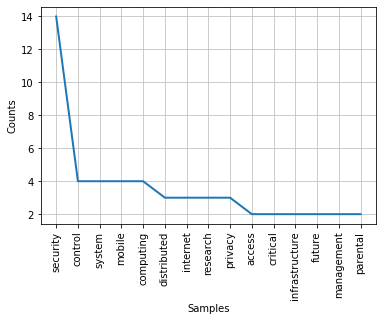

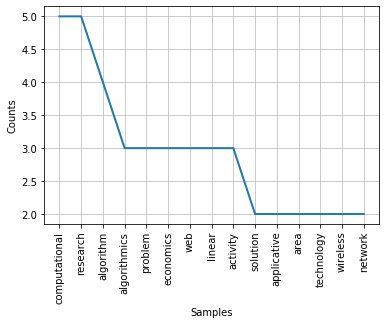

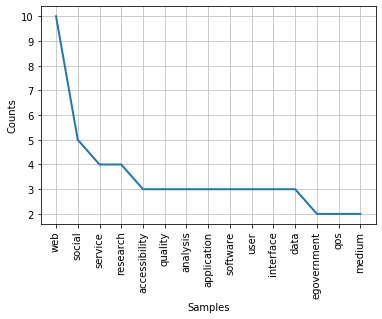

In [12]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [ ]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

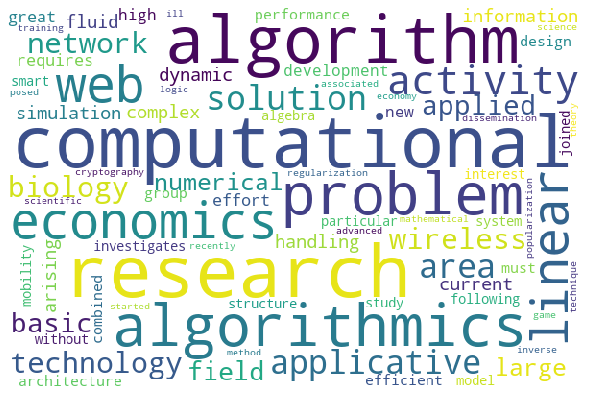

In [13]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[3]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

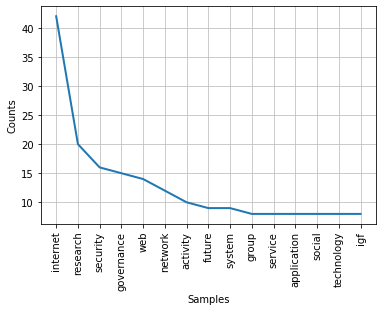

In [14]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

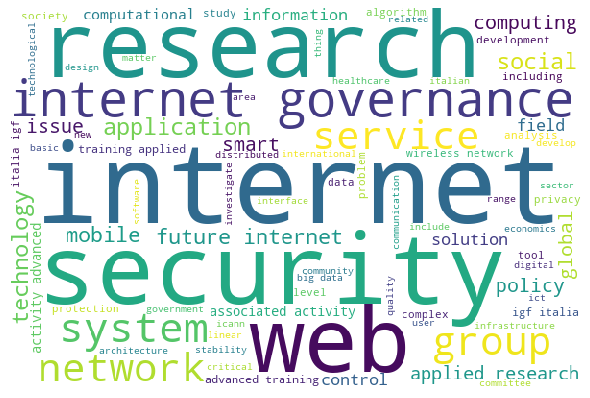

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## mutual information fra parola e centro di ricerca

In [16]:
from nltk import bigrams
import collections
import math
from math import log

#formula: PMI-IR (w1, w2) = log2 p(w1&w2)/p(w1)*p(w2); p=probability, w=word 

In [17]:
a1=tot_text.split()    
a2=collections.Counter(a1)
#a2= a2.most_common(15) 
a3=collections.Counter(bigrams(a2))
a4=sum([a2[x]for x in a2])
a5=sum([a3[x]for x in a3])
a6={x:float(a2[x])/a4 for x in a2} # word probabilities(w1 and w2)
a7={x:float(a3[x])/a5 for x in a3} # joint probabilites (w1&w2)
u = []
for x in a6:
    k={x:round(log(a7[b]/(a6[x] * a6[y]),2),4) for b in a7 for y in a6 if x and y in b}
    u.append(k)
    
u

[{'future': 7.6472},
 {'internet': 5.4248},
 {'ubiquitous': 9.8171},
 {'research': 6.4952},
 {'group': 7.8171},
 {'investigates': 9.8171},
 {'develops': 9.8171},
 {'prototype': 10.8171},
 {'innovative': 10.8171},
 {'solution': 8.4952},
 {'next': 10.8171},
 {'generation': 9.8171},
 {'enable': 10.8171},
 {'access': 9.8171},
 {'service': 7.8171},
 {'anytime': 10.8171},
 {'anywhere': 10.8171},
 {'without': 9.8171},
 {'pre': 10.8171},
 {'existing': 10.8171},
 {'network': 7.2321},
 {'infrastructure': 9.2321},
 {'application': 7.8171},
 {'field': 8.4952},
 {'apply': 10.8171},
 {'many': 10.8171},
 {'range': 9.2321},
 {'smart': 8.2321},
 {'city': 9.8171},
 {'intelligent': 10.8171},
 {'transportation': 10.8171},
 {'system': 7.6472},
 {'healthcare': 9.2321},
 {'environmental': 10.8171},
 {'protection': 8.8171},
 {'grid': 9.8171},
 {'area': 9.2321},
 {'concrete': 10.8171},
 {'example': 10.8171},
 {'called': 10.8171},
 {'cyber': 9.8171},
 {'physical': 9.8171},
 {'convergence': 10.8171},
 {'real': 1

In [18]:
values = [list(d.values())[0] for d in u]
values.sort()

Lista2 = []
for x in values:
    for d in u:
        val = list(d.values())[0]

        if x == val:
            Lista2.append({list(d.keys())[0]: x})
Lista2

[{'internet': 5.4248},
 {'research': 6.4952},
 {'security': 6.8171},
 {'governance': 6.9102},
 {'web': 7.0097},
 {'network': 7.2321},
 {'activity': 7.4952},
 {'future': 7.6472},
 {'system': 7.6472},
 {'future': 7.6472},
 {'system': 7.6472},
 {'group': 7.8171},
 {'service': 7.8171},
 {'application': 7.8171},
 {'social': 7.8171},
 {'technology': 7.8171},
 {'igf': 7.8171},
 {'group': 7.8171},
 {'service': 7.8171},
 {'application': 7.8171},
 {'social': 7.8171},
 {'technology': 7.8171},
 {'igf': 7.8171},
 {'group': 7.8171},
 {'service': 7.8171},
 {'application': 7.8171},
 {'social': 7.8171},
 {'technology': 7.8171},
 {'igf': 7.8171},
 {'group': 7.8171},
 {'service': 7.8171},
 {'application': 7.8171},
 {'social': 7.8171},
 {'technology': 7.8171},
 {'igf': 7.8171},
 {'group': 7.8171},
 {'service': 7.8171},
 {'application': 7.8171},
 {'social': 7.8171},
 {'technology': 7.8171},
 {'igf': 7.8171},
 {'group': 7.8171},
 {'service': 7.8171},
 {'application': 7.8171},
 {'social': 7.8171},
 {'technol